# Final Project : Prediksi Respon Pelanggan terhadap Penawaran Deposito


## Data Understanding

### Bussiness Understanding

<table>
<caption><b> Bussines Understanding and Goal </b><caption>
<tr><td><b>Dataset</b></td><td>: https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset</td></tr>

<tr><td><b>Introduction</b></td><td>: Meningkatkan ketertarikan pelanggan dengan deposito dapat dilakukan dengan strategi pemasaran yang baik.<br> Prediksi calon pelanggan yang akan melakukan deposito merupakan hal penting <br>untuk mengoptimalkan target pemasaran yang cocok untuk menggunakan produk.<br> Prediksi dilakukan dengan model yang akurat untuk menentukan pelanggan <br>akan tertarik produk deposito atau tidak.</td></tr>

<tr><td><b>Goal</b></td><td>: Memahami respon nasabah membuka/menolak deposito.</td></tr>
<tr><td><b>Bussiness objective</b></td><td>: Menyusun kampanye pemasaran yang lebih terpersonalisasi dan relevan.</td></tr>
</table>

### Feature Descriptions

<table>
<caption><b>Feature Descriptions</b><caption>
<tr><td><b>Age</b></td><td>: Usia pelanggan</td></tr>
<tr><td><b>Job</b></td><td>     : Pekerjaan pelanggan</td></tr>
<tr><td><b>Marital</b></td><td>  : Status pernikahan pelanggan, seperti menikah (Marriage), belum menikah (Single), dan bercerai (divorced)</td></tr>
<tr><td><b>Education</b></td><td>: Tingkat pendidikan pelanggan</td></tr>
<tr><td><b>Default</b></td><td>  : Indikator apakah pelanggan memiliki kredit macet, seperti iya (yes) atau tidak (no).</td></tr>
<tr><td><b>Balance</b></td><td>  : Saldo rata-rata tabungan nasabah di rekening.</td></tr>
<tr><td><b>Housing</b></td><td>  : Indikator apakah pelanggan punya pinjaman rumah, seperti iya (yes) atau tidak (no).</td></tr>
<tr><td><b>Loan</b></td><td>: Apakah pelanggan memiliki pinjaman pribadi, seperti iya (yes) atau tidak (no).</td></tr>
<tr><td><b>Contact</b></td><td>  : Jenis komunikasi yang bisa digunakan untuk menghubungi nasabah, seperti cellular atau telephone.</td></tr>
<tr><td><b>Month</b></td><td>   : Bulan ketika nasabah terakhir dihubungi.</td></tr>
<tr><td><b>Day</b></td><td>     : Hari dalam bulan ketika nasabah terakhir dihubungi.</td></tr>
<tr><td><b>Duration</b></td><td> : Durasi panggilan ke nasabah dalam detik.</td></tr>
<tr><td><b>Campaign</b></td><td> : Jumlah kontak yang telah dilakukan kepada nasabah.</td></tr>
<tr><td><b>P-days</b></td><td>  : Jumlah hari sejak nasabah terakhir dihubungi pada kampanye sebelumnya, -1 berarti nasabah belum pernah dihubungi.</td></tr>
<tr><td><b>Previous</b></td><td> : Jumlah kontak yang dilakukan kepada nasabah sebelum kampanye.</td></tr>
<tr><td><b>Poutcome</b></td><td> : Hasil dari kampanye pemasaran sebelumnya, seperti berhasil (success), gagal (failure) dan tidak diketahui (unknown).</td></tr>
<tr><td><b>Deposit</b></td><td>  : Target variabel apakah nasabah membuka deposito atau tidak (yes/no).</td></tr>

</table>

In [ ]:
#Install library
!pip install scipy==1.11.4
!pip install scikit-plot
!pip install dalex
!pip install shap
!pip install lime
!pip install optuna
!pip install scikit-learn==1.2.0 imbalanced-learn==0.10.1

In [ ]:
import pandas as pd #import library yang dibutuhkan
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency, kruskal, mannwhitneyu
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, make_scorer, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import dalex as dx
import shap
import optuna
from lime.lime_tabular import LimeTabularExplainer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import scikitplot as skplt
import joblib

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.show_versions(as_json=False)


INSTALLED VERSIONS
------------------
commit                : d9cdd2ee5a58015ef6f4d15c7226110c9aab8140
python                : 3.10.12.final.0
python-bits           : 64
OS                    : Linux
OS-release            : 6.1.85+
Version               : #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
machine               : x86_64
processor             : x86_64
byteorder             : little
LC_ALL                : en_US.UTF-8
LANG                  : en_US.UTF-8
LOCALE                : en_US.UTF-8

pandas                : 2.2.2
numpy                 : 1.26.4
pytz                  : 2024.2
dateutil              : 2.8.2
setuptools            : 75.1.0
pip                   : 24.1.2
Cython                : 3.0.11
pytest                : 8.3.4
hypothesis            : None
sphinx                : 8.1.3
blosc                 : None
feather               : None
xlsxwriter            : None
lxml.etree            : 5.3.0
html5lib              : 1.1
pymysql               : None
psycopg2   

In [ ]:
bank = pd.read_csv('bank.csv') #Import bank.csv

In [ ]:
bank.head() # Lima baris pertama dataset bank.csv

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
bank.shape #Baris dan kolom bank.csv

(11162, 17)

Dalam dataset ini terdapat 11162 baris dan 17 kolom.

In [ ]:
bank.info() #Informasi type data dan jumlah baris per kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


- Tipe data sudah sesuai.
- Dataset ini memiliki 7 kolom numerik dan 9 kolom kategorik dan 1 target.


## Data Cleaning

### Duplicated Data

In [ ]:
bank.duplicated().sum() #Jumlah duplikasi data bank.csv

0

Tidak terdapat duplikasi data.

### Missing Value

In [ ]:
bank.isna().sum() #Jumlah missing value data bank.csv

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Tidak terdapat nilai yang hilang pada data.

## Data Manipulation

In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
numeric = [] # Mengambil nama kolom numerik data bank.csv
categoric = [] # Mengambil nama kolom kategorik data bank.csv
for col in bank.columns:
  if bank[col].dtypes in ['int64', 'float']:
    numeric.append(col)
  elif bank[col].dtypes == 'object':
    categoric.append(col)
print(f'Terdapat {len(numeric)} feature numerik: ', numeric)
print(f'Terdapat {len(categoric)}  kategorik: ', categoric)

Terdapat 7 feature numerik:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Terdapat 10  kategorik:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


### Split Data

In [ ]:
X = bank.drop('deposit', axis=1) #Split data Train 80% dan test 20% dengan Fitur deposit menjadi target
y= bank['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3955,28,student,single,tertiary,no,5741,no,no,cellular,10,sep,1042,5,200,3,failure
11150,34,management,married,secondary,no,355,no,no,cellular,21,aug,314,3,-1,0,unknown
5173,48,unemployed,divorced,secondary,no,201,no,no,cellular,10,nov,594,1,91,1,success
3017,53,entrepreneur,married,tertiary,no,1961,no,no,cellular,15,dec,351,1,-1,0,unknown
2910,53,management,married,tertiary,no,1624,no,no,cellular,11,nov,166,3,97,7,success


In [ ]:
print('Jumlah Baris dan kolom data train:', X_train.shape)
print('Jumlah Baris dan kolom data test:', X_test.shape)

Jumlah Baris dan kolom data train: (8929, 16)
Jumlah Baris dan kolom data test: (2233, 16)


In [ ]:
X_train_real = X_train.copy() # Membuat copy data untuk memisahkan data yang diencoding dan tidak
X_test_real = X_test.copy()
y_train_real = y_train.copy()
y_test_real = y_test.copy()

### Encoding

In [ ]:
y_train = y_train.map({'yes':1, 'no':0}) #Encoding fitur deposit 1: Membuka deposit dan 0: Menolak deposit (train)

In [ ]:
y_test = y_test.map({'yes':1, 'no':0}) #Encoding fitur deposit 1: Membuka deposit dan 0: Menolak deposit (test)

In [ ]:
numeric_new = [] # Mengambil nama kolom numerik data setelah displit
categoric_new = []# Mengambil nama kolom kategorik data setelah displit
for col in bank.columns:
  if bank[col].dtypes in ['int64', 'float']:
    numeric_new.append(col)
  elif bank[col].dtypes == 'object':
    categoric_new.append(col)
print('Kolom numerik', numeric_new)
print('Kolom kategorik', categoric_new)

Kolom numerik ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Kolom kategorik ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


In [ ]:
fill_category = [] #Mengecek nilai unik per feature
for i in X_train.columns:
  if X_train[i].dtypes == 'object':
    fill_category.append({'Columns': i, 'Category':X_train[i].unique()})
fill_category

[{'Columns': 'job',
  'Category': array(['student', 'management', 'unemployed', 'entrepreneur',
         'technician', 'admin.', 'housemaid', 'services', 'blue-collar',
         'self-employed', 'retired', 'unknown'], dtype=object)},
 {'Columns': 'marital',
  'Category': array(['single', 'married', 'divorced'], dtype=object)},
 {'Columns': 'education',
  'Category': array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)},
 {'Columns': 'default', 'Category': array(['no', 'yes'], dtype=object)},
 {'Columns': 'housing', 'Category': array(['no', 'yes'], dtype=object)},
 {'Columns': 'loan', 'Category': array(['no', 'yes'], dtype=object)},
 {'Columns': 'contact',
  'Category': array(['cellular', 'unknown', 'telephone'], dtype=object)},
 {'Columns': 'month',
  'Category': array(['sep', 'aug', 'nov', 'dec', 'may', 'oct', 'jun', 'jul', 'apr',
         'jan', 'mar', 'feb'], dtype=object)},
 {'Columns': 'poutcome',
  'Category': array(['failure', 'unknown', 'success', 'other'], dtyp

<table border='1'>
<caption> Encoding Feature Categorical</caption>
<tr>
  <td rowspan='12'><b>Job</b></td>
  <td>0</td>
  <td>unknown</td>
</tr>
<tr>
  <td>1</td>
  <td>admin</td>
</tr>
<tr>
  <td>2</td>
  <td>technician</td>
</tr>
<tr>
  <td>3</td>
  <td>services</td>
</tr>
<tr>
  <td>4</td>
  <td>management</td>
</tr>
<tr>
  <td>5</td>
  <td>retired</td>
</tr>
<tr>
  <td>6</td>
  <td>blue-collar</td>
</tr>
<tr>
  <td>7</td>
  <td>unemployee</td>
</tr>
<tr>
  <td>8</td>
  <td>entrepreneur</td>
</tr>
<tr>
  <td>9</td>
  <td>housemaid</td>
</tr>
<tr>
  <td>10</td>
  <td>self-employed</td>
</tr>
<tr>
  <td>11</td>
  <td>student</td>
</tr>
<tr>
  <td rowspan='3'><b>Marital</b></td>
  <td>0</td>
  <td>single</td>
</tr>
<tr>
  <td>1</td>
  <td>married</td>
</tr>
<tr>
  <td>2</td>
  <td>divorced</td>
</tr>
<tr>
  <td rowspan='4'><b>Education</b></td>
  <td>0</td>
  <td>unknown</td>
</tr>
<tr>
  <td>1</td>
  <td>primary</td>
</tr>
<tr>
  <td>2</td>
  <td>secondary</td>
</tr>
<tr>
  <td>3</td>
  <td>tertiary</td>
</tr>
<tr>
  <td rowspan='2'><b>Default</b></td>
  <td>0</td>
  <td>No</td>
</tr>
<tr>
  <td>1</td>
  <td>Yes</td>
</tr>
<tr>
  <td rowspan='2'><b>Housing</b></td>
  <td>0</td>
  <td>No</td>
</tr>
<tr>
  <td>1</td>
  <td>Yes</td>
</tr>
<tr>
  <td rowspan='2'><b>Loan</b></td>
  <td>0</td>
  <td>No</td>
</tr>
<tr>
  <td>1</td>
  <td>Yes</td>
</tr>
<tr>
  <td rowspan='3'><b>Contact</b></td>
  <td>0</td>
  <td>unknown</td>
</tr>
<tr>
  <td>1</td>
  <td>cellular</td>
</tr>
<tr>
  <td>2</td>
  <td>telephone</td>
</tr>
<tr>
  <td><b>Month</b></td>
  <td>1-12</td>
  <td>January-December</td>
</tr>
<tr>
  <td rowspan='3'><b>Poutcome</b></td>
  <td>0</td>
  <td>unknown and other</td>
</tr>
<tr>
  <td>1</td>
  <td>success</td>
</tr>
<tr>
  <td>2</td>
  <td>failure</td>
</tr>
</table>

In [ ]:
#Melakukan encoding dengan label encoder (train)

for col in X_train.columns:
    if col == 'job':
      X_train[col] = X_train[col].map({'unknown':0,'admin.':1,'technician':2, 'services':3,
                                     'management':4,'retired':5, 'blue-collar':6, 'unemployed':7,
                                     'entrepreneur':8,'housemaid':9,'self-employed':10, 'student':11}) # buat feature engineerin
    elif col == 'marital':
      X_train[col] = X_train[col].map({'single':0, 'married':1, 'divorced':2})
    elif col == 'education':
      X_train[col] = X_train[col].map({'tertiary':3, 'secondary':2, 'unknown':0, 'primary':1})
    elif col == 'default':
      X_train[col] = X_train[col].map({'no': 0, 'yes': 1})
    elif col == 'housing':
      X_train[col] = X_train[col].map({'no': 0, 'yes': 1})
    elif col == 'loan':
      X_train[col] = X_train[col].map({'no': 0, 'yes': 1})
    elif col == 'contact':
      X_train[col] = X_train[col].map({'unknown':0, 'cellular':1, 'telephone':2}) #yes/no
    elif col == 'month':
      X_train[col] = X_train[col].map({'jan':1, 'feb':2, 'mar':3, 'apr':4,
                                     'may':5, 'jun':6, 'jul':7, 'aug':8,
                                     'sep':9, 'oct':10, 'nov':11, 'dec':12})
    elif col == 'poutcome':
      X_train[col] = X_train[col].map({'unknown':0, 'success':1, 'failure':2, 'other':0}) # buat feature

X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3955,28,11,0,3,0,5741,0,0,1,10,9,1042,5,200,3,2
11150,34,4,1,2,0,355,0,0,1,21,8,314,3,-1,0,0
5173,48,7,2,2,0,201,0,0,1,10,11,594,1,91,1,1
3017,53,8,1,3,0,1961,0,0,1,15,12,351,1,-1,0,0
2910,53,4,1,3,0,1624,0,0,1,11,11,166,3,97,7,1


In [ ]:
#Melakukan encoding dengan label encoder (test)
for col in X_test.columns:
    if col == 'job':
      X_test[col] = X_test[col].map({'unknown':0,'admin.':1,'technician':2, 'services':3,
                                     'management':4,'retired':5, 'blue-collar':6, 'unemployed':7,
                                     'entrepreneur':8,'housemaid':9,'self-employed':10, 'student':11})
    elif col == 'marital':
      X_test[col] = X_test[col].map({'single':0, 'married':1, 'divorced':2})
    elif col == 'education':
      X_test[col] = X_test[col].map({'tertiary':3, 'secondary':2, 'unknown':0, 'primary':1})
    elif col == 'default':
      X_test[col] = X_test[col].map({'no': 0, 'yes': 1})
    elif col == 'housing':
      X_test[col] = X_test[col].map({'no': 0, 'yes': 1})
    elif col == 'loan':
      X_test[col] = X_test[col].map({'no': 0, 'yes': 1})
    elif col == 'contact':
      X_test[col] = X_test[col].map({'unknown':0, 'cellular':1, 'telephone':2})
    elif col == 'month':
      X_test[col] = X_test[col].map({'jan':1, 'feb':2, 'mar':3, 'apr':4,
                                     'may':5, 'jun':6, 'jul':7, 'aug':8,
                                     'sep':9, 'oct':10, 'nov':11, 'dec':12})
    elif col == 'poutcome':
      X_test[col] = X_test[col].map({'unknown':0, 'success':1, 'failure':2, 'other':0})

X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
5527,65,5,2,2,0,744,0,0,1,5,7,182,1,-1,0,0
4541,38,6,1,2,0,1627,0,0,0,16,6,1323,9,-1,0,0
1964,35,6,0,2,0,4963,1,0,1,14,5,456,1,300,1,2
5007,47,6,1,2,0,8229,0,0,1,8,8,784,2,-1,0,0
8928,35,2,1,3,0,1473,1,0,0,12,5,84,3,-1,0,0


In [ ]:
new_bank_real = pd.concat([X_train_real, y_train_real], axis=1) #membuat dataset baru yang berisi data train tanpa encoding
new_bank_encoding = pd.concat([X_train, y_train], axis=1)#membuat dataset baru yang berisi data train dengan encoding
new_bank_real.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3955,28,student,single,tertiary,no,5741,no,no,cellular,10,sep,1042,5,200,3,failure,yes
11150,34,management,married,secondary,no,355,no,no,cellular,21,aug,314,3,-1,0,unknown,no
5173,48,unemployed,divorced,secondary,no,201,no,no,cellular,10,nov,594,1,91,1,success,yes
3017,53,entrepreneur,married,tertiary,no,1961,no,no,cellular,15,dec,351,1,-1,0,unknown,yes
2910,53,management,married,tertiary,no,1624,no,no,cellular,11,nov,166,3,97,7,success,yes


## Exploratory Data Analysis (EDA)

### Data Exploration

In [ ]:
X_train.describe() #statistik data train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000
mean,41.242356,4.411356,0.798074,2.112891,0.014895,1520.506328,0.471049,0.132938,0.860679,15.629970,6.208198,370.224549,2.506440,50.732557,0.811289,0.313249
std,11.887444,2.600534,0.624769,0.792565,0.121141,3135.126582,0.499189,0.339526,0.506751,8.445399,2.567371,345.949019,2.705238,108.640328,2.207104,0.658284
min,18.000000,0.000000,0.000000,0.000000,0.000000,-3058.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,2.000000,0.000000,2.000000,0.000000,121.000000,0.000000,0.000000,1.000000,8.000000,5.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,4.000000,1.000000,2.000000,0.000000,549.000000,0.000000,0.000000,1.000000,15.000000,6.000000,253.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,6.000000,1.000000,3.000000,0.000000,1714.000000,1.000000,0.000000,1.000000,22.000000,8.000000,493.000000,3.000000,2.000000,1.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,12.000000,3881.000000,63.000000,854.000000,58.000000,2.000000


**Penjelasan statistik data numerik:**
*  Fitur terbilang masuk akal.
*  Terdapat fitur yang terindikasi adanya nilai ekstrim (age, balance, duration, campaign, pdays dan previous).
* Dapat dilanjutkan dengan penanganan nilai ekstrim(outliers handling).



#### Total of Deposit

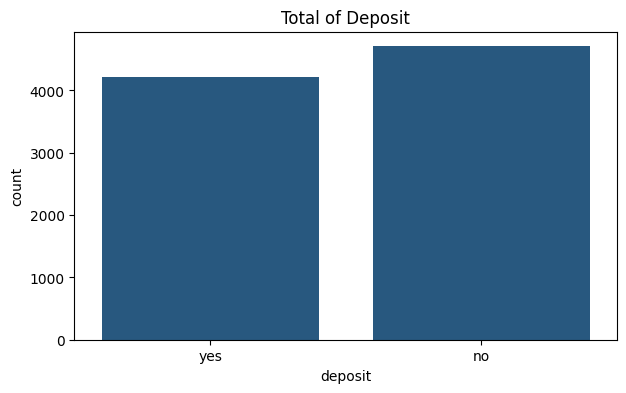

In [ ]:
plt.figure(figsize=(7,4)) #distribusi data target(deposit)
sns.countplot(x=y_train_real, color='#19598d')
plt.title('Total of Deposit')
plt.show()

**Penjelasan jumlah deposito:**<br>
Jumlah feature deposit menunjukan mayoritas nasabah memilih untuk menolak deposit.

#### Correlation of Numerical Feature

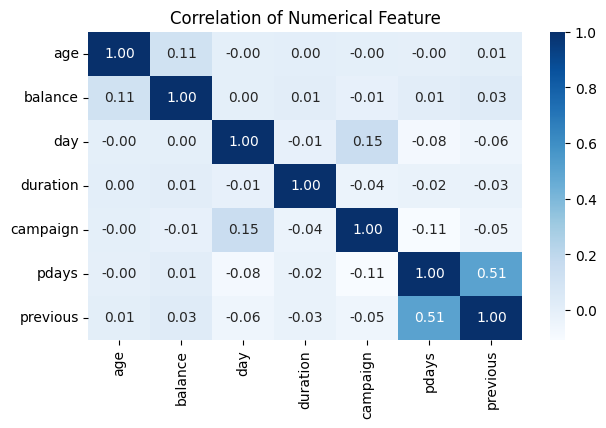

In [ ]:
corelate = new_bank_real[numeric_new].corr() #mengcek hubungan antar feature numerik

plt.figure(figsize=(7,4))
sns.heatmap(data=corelate, fmt='.2f', cmap='Blues', annot=True)
plt.title('Correlation of Numerical Feature')
plt.show()

**Penjelasan korelasi feature numerik:**<br>
Fitur saling independen satu sama lainnya.

### Hipotesis

In [ ]:
X_train_real[numeric_new].describe() #mengecek distribusi feature numerik

,age,balance,day,duration,campaign,pdays,previous
count,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000
mean,41.242356,1520.506328,15.629970,370.224549,2.506440,50.732557,0.811289
std,11.887444,3135.126582,8.445399,345.949019,2.705238,108.640328,2.207104
min,18.000000,-3058.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,121.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,549.000000,15.000000,253.000000,2.000000,-1.000000,0.000000
75%,49.000000,1714.000000,22.000000,493.000000,3.000000,2.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


**Penjelasan distribusi feature numerik:**<br>
Feature numerik memiliki distribusi yang tidak normal, hipotesis dilanjutkan dengan Mann-Whiteney U Test

In [ ]:
# Memisahkan feature numeric berdasarkan target
fitur_no = []
fitur_yes = []
for col in numeric_new:
  deposit_no = new_bank_encoding[new_bank_encoding['deposit'] == 0][col]
  fitur_no.append({'Feature': col, 'Results': deposit_no})
  deposit_yes = new_bank_encoding[new_bank_encoding['deposit'] == 1][col]
  fitur_yes.append({'Feature': col, 'Results': deposit_yes})

In [ ]:
# Hipotesis feature numerical dengan target
results = []
for no, yes in zip(fitur_no, fitur_yes):
  feature = no['Feature']
  cat_no = no['Results']
  cat_yes = yes['Results']

  stats, p_value = mannwhitneyu(cat_no, cat_yes)
  results.append({
      'Feature': feature,
      'P_value': p_value,
      'Decision': 'Yes' if p_value < 0.05 else 'No'
  })

mann_df = pd.DataFrame(results)
mann_df = mann_df.sort_values(by='P_value', ascending =True)

In [ ]:
# Hipotesis feature categorical dengan target
cat_hipotesis =[]
for col in categoric_new:
  if col != 'deposit':
    combine = pd.crosstab(X_train[col], y_train)
    chi, p_value, dof, expected = chi2_contingency(combine)
    if p_value < 0.05:
      acc = 'Yes'
    elif p_value >= 0.05:
      acc = 'No'
    cat_hipotesis.append({'Feature': col, 'P_value': p_value, 'Decision': acc})
hipotesis_chi = pd.DataFrame(cat_hipotesis)
hipotesis_chi = hipotesis_chi.sort_values(by='P_value', ascending=True)

In [ ]:
hipotesis_bank = pd.concat([mann_df, hipotesis_chi], axis=0) # menggabungkan hipotesis numerik dan kategorikal
hipotesis_bank = hipotesis_bank.sort_values(by='P_value', axis=0)
hipotesis_bank

,Feature,P_value,Decision
3,duration,0.000000e+00,Yes
7,month,3.183573e-174,Yes
8,poutcome,3.512810e-165,Yes
6,contact,4.419516e-129,Yes
6,previous,1.201238e-105,Yes
5,pdays,8.652082e-91,Yes
4,housing,2.939924e-75,Yes
0,job,2.869934e-51,Yes
1,balance,1.143127e-46,Yes
4,campaign,2.370392e-32,Yes


**Penjelasan hipotesis:**<br>
15 feature berpengaruh dalam respon nasabah membuka/menolak deposito, sedangkan feature usia (age) tidak berpengaruh pada target.

### Deep Dive EDA

#### Contact Section

###### Pdays vs Deposit

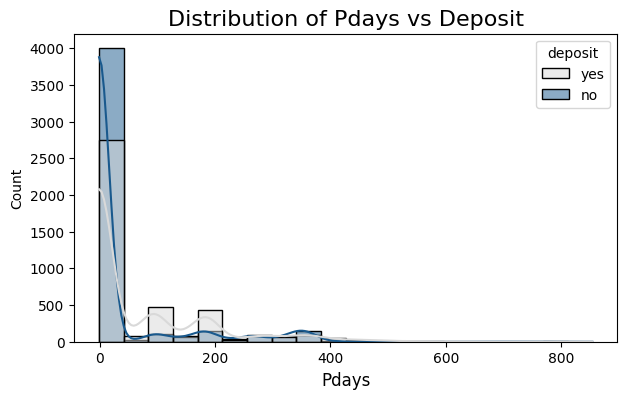

In [ ]:
custom_color = sns.color_palette(['#d9d9d9', '#19598d']) #membuat kombinasi warna
plt.figure(figsize=(7,4))
sns.histplot(x= X_train_real['pdays'], hue=y_train_real, bins= 20, kde=True, palette=custom_color)#distribusi feature pdays menggunakan histoplot
plt.title('Distribution of Pdays vs Deposit', fontsize=16)
plt.xlabel('Pdays', fontsize=12)
plt.show()

In [ ]:
count_pdays_deposit_yes = new_bank_real[(new_bank_real['deposit'] == 'yes') ]['pdays'].count() #menghitung total baris pada pdays yang membuka deposit
count_new_cust = new_bank_real[(new_bank_real['deposit'] == 'yes') & (new_bank_real['pdays'] == -1)]['pdays'].count() #menghitung total baris pada pdays = -1 yang membuka deposit
count_pdays_deposit_yes_percent = round((count_new_cust/count_pdays_deposit_yes)*100) #menghitung persentase pdyas =-1 pada deposit yes
if count_pdays_deposit_yes_percent > 50:
  print(f'Nilai pdays (-1) {count_pdays_deposit_yes_percent}%: Mayoritas nasabah belum pernah diberikan kampanye markerting')
else:
  print(f'Nilai pdays (>-1) {count_pdays_deposit_yes_percent}%: Mayoritas nasabah pernah diberikan kampanye markerting')

Nilai pdays (-1) 64%: Mayoritas nasabah belum pernah diberikan kampanye markerting


**Penjelasan distribusi pdays vs deposit:**<br>
Mayoritas nasabah dalam dataset ini belum pernah diberikan kampanye marketing produk deposito sebelumnya.

##### Duration vs Deposit

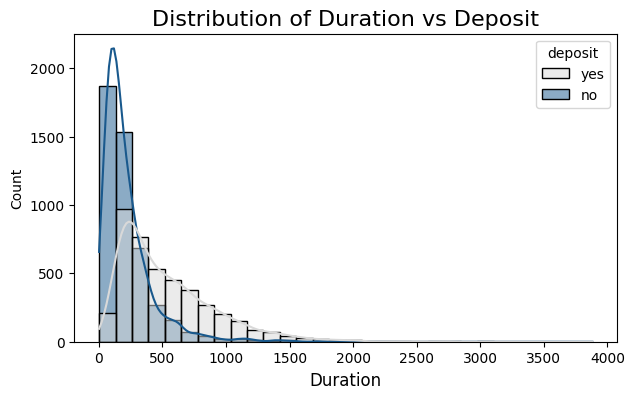

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(x= X_train_real['duration'], hue=y_train_real, bins= 30, kde=True, palette=custom_color)#distribusi feature duration menggunakan histoplot
plt.title('Distribution of Duration vs Deposit', fontsize=16)
plt.xlabel('Duration', fontsize=12)
plt.show()

In [ ]:
avg_duration_deposit_yes = new_bank_real[new_bank_real['deposit'] == 'yes']['duration'].mean() #mengecek rata-rata lama durasi panggilan kepada nasabah
print(f'Nilai rata-rata durasi pamggilan berdasarkan nasabah yang membuka deposito {round(avg_duration_deposit_yes)} detik')

Nilai rata-rata durasi pamggilan berdasarkan nasabah yang membuka deposito 536 detik


**Penjelasan distribusi durasi vs deposit:**<br>
Hal ini menunjukan bahwa semakin lama durasi kampanye marketing yang dilakukan kepada nasabah, akan membuat nasabah membuka deposit.

##### Contact vs Deposit

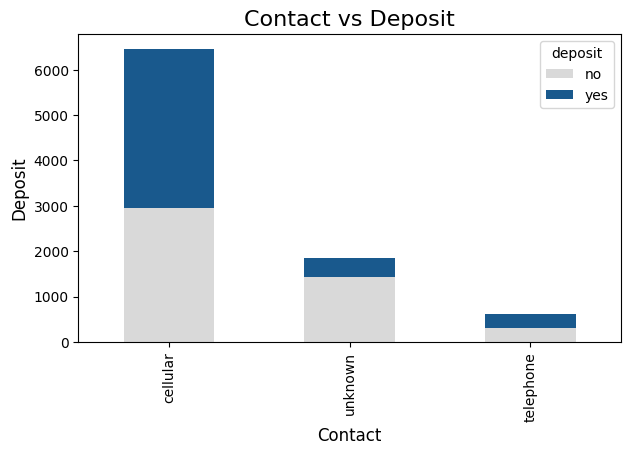

In [ ]:
combine_contact = pd.crosstab(X_train_real['contact'], y_train_real) #menggabungkan data contact dengan target
combine_contact = combine_contact.sort_values(by='yes', axis=0, ascending=False) #mengurutkan datanya agar lebih mudah dibaca
combine_contact.plot(kind='bar', stacked=True, color=custom_color, figsize=(7,4)) #membuat data menjadi stacked bar chart
plt.title('Contact vs Deposit', fontsize=16)
plt.xlabel('Contact', fontsize=12)
plt.ylabel('Deposit', fontsize=12)
plt.show()

**Penjelasan distribusi contact vs deposit:**<br>
Paling sering kontak yang digunakan untuk menghubungi nasabah yang membuka dan menolak deposito adalah cellular.

#### Financial Section

##### Loan vs Deposit

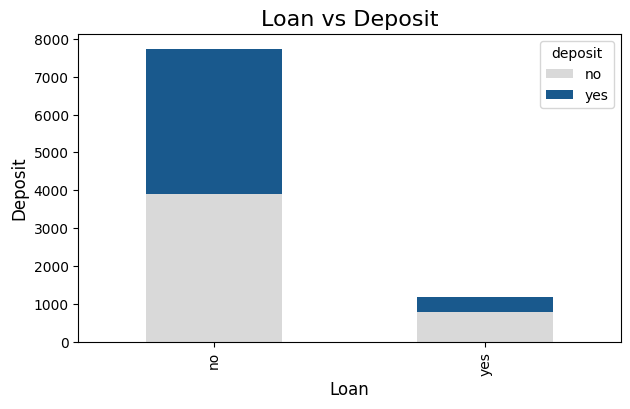

In [ ]:
combine_loan= pd.crosstab(X_train_real['loan'], y_train_real) #menggabungkan feature loan dengan target
combine_loan.plot(kind='bar', stacked=True, color=custom_color, figsize=(7,4))#membuat data menjadi stacked bar chart
plt.title('Loan vs Deposit', fontsize=16)
plt.xlabel('Loan', fontsize=12)
plt.ylabel('Deposit', fontsize=12)
plt.show()

**Penjelasan loan vs deposit:**<br>
Mayoritas nasabah yang membuka/menolak deposito tidak memiliki pinjaman pribadi.

##### Housing vs Deposit

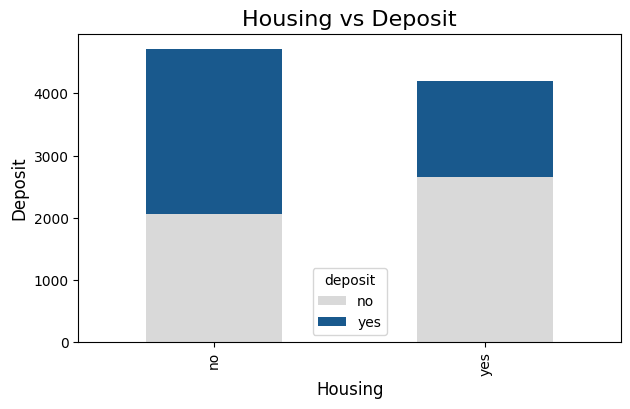

In [ ]:
combine_housing = pd.crosstab(X_train_real['housing'], y_train_real) #menggabungkan feature housing dengan target
combine_housing = combine_housing.sort_values(by='yes', axis=0, ascending=False) #mengurutkan datanya agar lebih mudah dibaca
combine_housing.plot(kind='bar', stacked=True, color=custom_color, figsize=(7,4)) #membuat data menjadi stacked bar chart
plt.title('Housing vs Deposit', fontsize=16)
plt.xlabel('Housing', fontsize=12)
plt.ylabel('Deposit', fontsize=12)
plt.show()

**Penjelasan housing vs deposit:**<br>
- Mayoritas nasabah yang membuka deposit tidak memiliki pinjaman rumah.
- Sedangkan, nasabah yang menolak deposit mayoritas memiliki pinjaman rumah.

##### Default vs Deposit

Text(0, 0.5, 'Deposit')

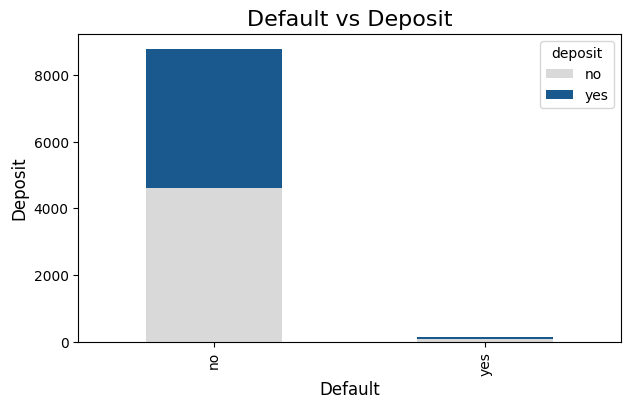

In [ ]:
combine_job= pd.crosstab(X_train_real['default'], y_train_real) #menggabungkan feature defaulft dengan target
combine_job.plot(kind='bar', stacked=True, color=custom_color, figsize=(7,4)) #membuat data menjadi stacked bar chart
plt.title('Default vs Deposit', fontsize=16)
plt.xlabel('Default', fontsize=12)
plt.ylabel('Deposit', fontsize=12)

**Penjelasan default vs deposit:**<br>
Mayoritas nasabah yang membuka/menolak deposito tidak memiliki kredit macet.

##### Balance vs Deposit

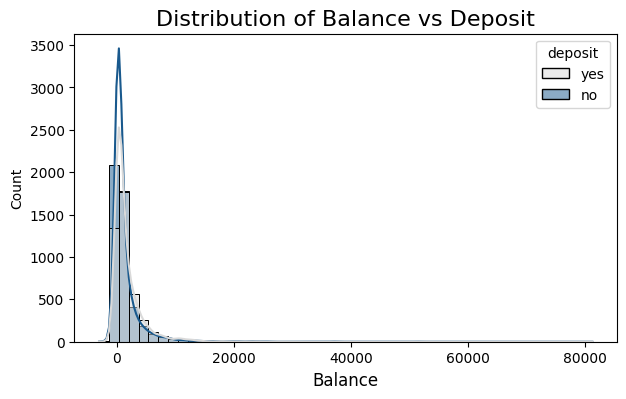

In [ ]:
plt.figure(figsize=(7,4)) #distribusi feature balance menggunakan histoplot
sns.histplot(x= X_train_real['balance'], hue=y_train_real, bins= 50, kde=True, palette=custom_color)
plt.title('Distribution of Balance vs Deposit', fontsize=16)
plt.xlabel('Balance', fontsize=12)
plt.show()

In [ ]:
avg_balance_deposit_yes = new_bank_real[new_bank_real['deposit'] == 'yes']['balance'].mean() #menghitung rata-rata balance berdasarkan deposit yes
print('Nilai rata-rata balance berdasarkan nasabah yang membuka deposito', round(avg_balance_deposit_yes)) #print rata-rata dengan pembulatan

Nilai rata-rata balance berdasarkan nasabah yang membuka deposito 1759


**Penjelasan distribusi balance vs deposit:**<br>
Mayoritas nasabah yang membuka deposito cenderung memiliki saldo rata-rata yang tinggi, dibandingkan yang menolak deposito.

#### Customer Demographics

##### Job vs Deposit

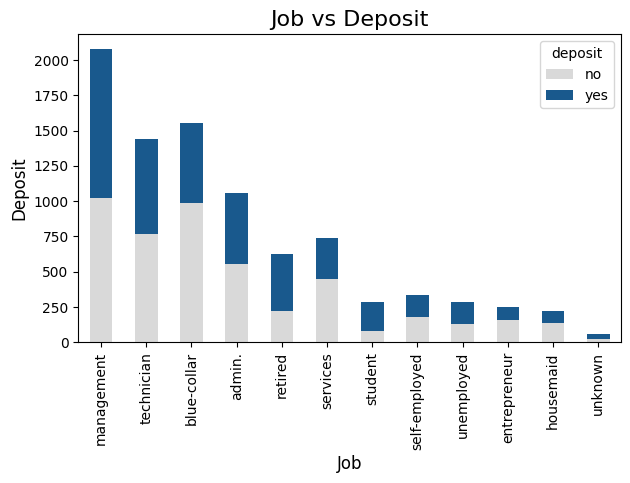

In [ ]:
combine_job= pd.crosstab(X_train_real['job'], y_train_real) #menggabungkan feature job dengan target
combine_job = combine_job.sort_values(by='yes', axis=0, ascending=False) #mengurutkan datanya agar lebih mudah dibaca
combine_job.plot(kind='bar', stacked=True, color=custom_color, figsize=(7,4)) #membuat data menjadi stacked bar chart
plt.title('Job vs Deposit', fontsize=16)
plt.xlabel('Job', fontsize=12)
plt.ylabel('Deposit', fontsize=12)
plt.show()

**Penjelasan job vs deposit**:<br>
- Mayoritas nasabah yang membuka/menolak deposit merupakan management
- Diikuti mayoritas membuka deposit adalah technician.

##### Marital vs Deposit

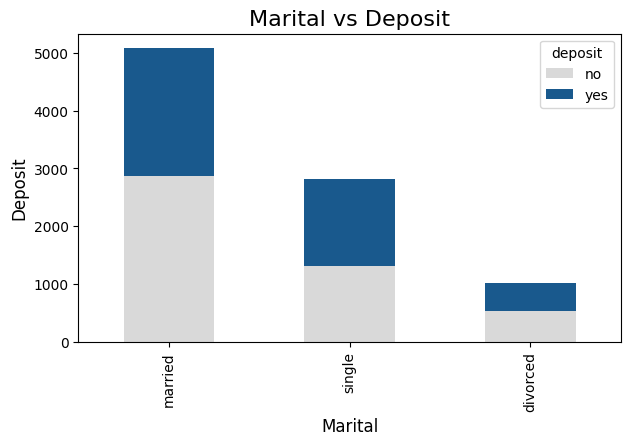

In [ ]:
combine_marital= pd.crosstab(X_train_real['marital'], y_train_real) #menggabungkan feature marital dengan deposit
combine_marital = combine_marital.sort_values(by='yes', axis=0, ascending=False) #mengurutkan datanya agar lebih mudah dibaca
combine_marital.plot(kind='bar', stacked=True, color=custom_color, figsize=(7,4))#membuat data menjadi stacked bar chart
plt.title('Marital vs Deposit', fontsize=16)
plt.xlabel('Marital', fontsize=12)
plt.ylabel('Deposit', fontsize=12)
plt.show()

**Penjelasan marial vs deposit:**<br>
Mayoritas nasabah yang membuka/menolak deposit memiliki status pernikahan.

## Feature Enginering

### Outliers Handling


In [ ]:
Q1 = X_train[numeric_new].quantile(0.25)
Q3 = X_train[numeric_new].quantile(0.75)

IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = (X_train[numeric_new] < lower) | (X_train[numeric_new] > upper)

outliers_bank = outliers.sum(axis=0)
print(f'Jumlah baris outliers')
df = pd.DataFrame(outliers_bank)
df

Jumlah baris outliers


,0
age,132
balance,843
day,0
duration,516
campaign,482
pdays,2223
previous,999


In [ ]:
X_train[numeric_new] = X_train[numeric_new].clip(lower=lower, upper=upper, axis=1) # imputasi nilai outliers dengan nilai batas bawah dan batas atas IQR

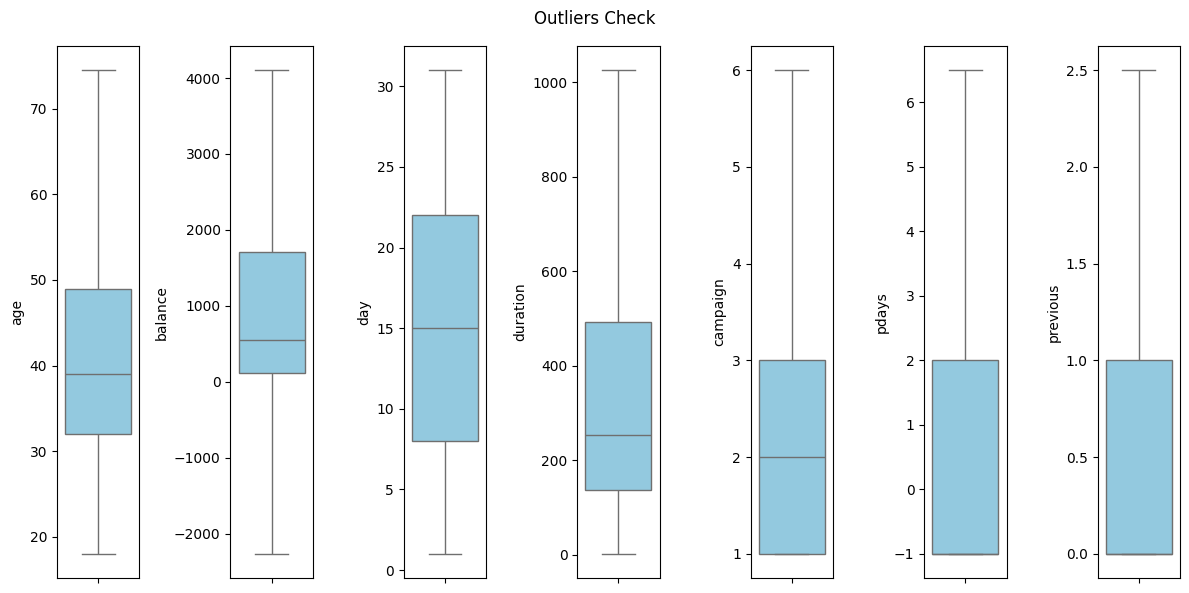

In [ ]:
plt.figure(figsize=(12,6)) #mengecek kembali outliers pada feature menggunakan boxplot

for i in range(0, len(numeric_new)):
  plt.subplot(1, len(numeric_new), i+1)
  sns.boxplot(y=X_train[numeric_new[i]], color='skyblue')
  plt.tight_layout()
  plt.suptitle('Outliers Check')

**Penjelasan boxplot:**<br>
Boxplot di atas menunjukan bahwa tidak adalagi nilai yang ekstrim.

### Add New Feature: Duration category
1. Mengkelompokan lama durasi telepon.
2. Menghapus feature duration yang asli.
3. Mengubah tipe data duration_cat menjadi numerik.

<table border='1'>
<caption>Keterangan</caption>
<tr>
  <td rowspan='4'><b>Duration Categorical</b></td>
  <td>0-100 detik</td>
  <td>short</td>
</tr>
<tr>
  <td>100-300 detik</td>
  <td>medium</td>
</tr>
<tr>
  <td>300-600 detik</td>
  <td>long</td>
</tr>
<tr>
  <td>>600 detik</td>
  <td>very_long</td>
</tr>




In [ ]:
X_train['duration_cat'] = pd.cut(X_train['duration'], bins=[0, 100, 300, 600, float('inf')],#mengkelompokan data berdasarkan lama durasi
                                labels=['short', 'medium', 'long', 'very_long'])
X_test['duration_cat'] = pd.cut(X_test['duration'], bins=[0, 100, 300, 600, float('inf')],
                                labels=['short', 'medium', 'long', 'very_long'])

In [ ]:
X_train = X_train.drop('duration', axis=1) #menghapus feature duration yang asli
X_test = X_test.drop('duration', axis=1)

In [ ]:
print(X_train['duration_cat'].value_counts())#mengecek apakah sudah benar datanya
print(X_test['duration_cat'].value_counts())

duration_cat
medium       3763
long         2086
very_long    1700
short        1380
Name: count, dtype: int64
duration_cat
medium       870
long         554
very_long    452
short        357
Name: count, dtype: int64


In [ ]:
X_train['duration_cat'] = X_train['duration_cat'].map({'short':0, 'medium':1, 'long':2, 'very_long':3})#encoding kembali data duration_cat
X_test['duration_cat']  = X_test['duration_cat'].map({'short':0, 'medium':1, 'long':2, 'very_long':3})

In [ ]:
X_train['duration_cat'] = X_train['duration_cat'].astype('int') #mengganti tipe data duration_cat
X_test['duration_cat'] = X_test['duration_cat'].astype('int')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8929 entries, 3955 to 7270
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           8929 non-null   float64
 1   job           8929 non-null   int64  
 2   marital       8929 non-null   int64  
 3   education     8929 non-null   int64  
 4   default       8929 non-null   int64  
 5   balance       8929 non-null   float64
 6   housing       8929 non-null   int64  
 7   loan          8929 non-null   int64  
 8   contact       8929 non-null   int64  
 9   day           8929 non-null   int64  
 10  month         8929 non-null   int64  
 11  campaign      8929 non-null   int64  
 12  pdays         8929 non-null   float64
 13  previous      8929 non-null   float64
 14  poutcome      8929 non-null   int64  
 15  duration_cat  8929 non-null   int64  
dtypes: float64(4), int64(12)
memory usage: 1.4 MB


### Add New Feature: Financial stress
1. Membuat fitur financial stress, di mana dapat mengetahui indikator penting yang mencerminkan resiko financial nasabah.

  **Financial stress = loan + housing + default (kredit macet)**

2. Menghapus fitur loan, housing dan default sebelumnya

<table border='1'>
<caption>Keterangan</caption>
<tr>
  <td rowspan='4'><b>Financial Stress Categorical</b></td>
  <td>0</td>
  <td>low stress</td>
</tr>
<tr>
  <td>1</td>
  <td>medium stress</td>
</tr>
<tr>
  <td>2</td>
  <td>high stress</td>
</tr>
<tr>
  <td>3</td>
  <td>critical stress</td>
</tr>

In [ ]:
X_train['financial_stress'] = X_train['loan'] + X_train['housing'] + X_train['default'] #fungsi menjumlahkan feature untuk menentukan financial stress
X_test['financial_stress'] = X_test['loan'] + X_test['housing'] + X_test['default']

In [ ]:
X_train = X_train.drop(['loan', 'housing', 'default'], axis=1) #menghapus feature asli
X_test = X_test.drop(['loan', 'housing', 'default'], axis=1)

In [ ]:
X_train['financial_stress'].unique() #mengecek nilai unik feature

array([0, 1, 2, 3])

### Add New Feature: Prevoius Campaign
1. Mengkelompokan nasabah yang belum pernah mendapatkan kampanye marketing sebelumnya.
2. Menghapus fitur pdays sebelumnya.

<table border='1'>
<caption>Keterangan</caption>
<tr>
  <td rowspan='2'><b>Customer New</b></td>
  <td>0</td>
  <td>>-1</td>
  <td>No Participate</td>
</tr>
<tr>
  <td>1</td>
  <td>-1</td>
  <td>Participate</td>
</tr>
<tr>

In [ ]:
X_train['previous_campaign'] = X_train['pdays'].apply(lambda x: 1 if x == -1 else 0) #mengkelompokan dan encoding hasil kampanye sebelumnya
X_test['previous_campaign']  = X_test['pdays'].apply(lambda x: 1 if x == -1 else 0)

In [ ]:
X_train = X_train.drop('pdays', axis=1) #menghapus kolom sebelumnya
X_test = X_test.drop('pdays', axis=1)

In [ ]:
X_train['previous_campaign'].unique()

array([0, 1])

### Add New Feature: Job grouped
1. Mengkelompokan pekerjaan nasabah
2. Menghapus kolom sebelumnya
<table border='1'>
<caption>Keterangan</caption>
<tr>
  <td rowspan='6'><b>Job Categorical</b></td>
  <td>0</td>
  <td>others</td>
</tr>
<tr>
  <td>1</td>
  <td>office_jobs</td>
</tr>
<tr>
  <td>2</td>
  <td>bussiness_job</td>
</tr>
<tr>
  <td>3</td>
  <td>technician_job</td>
</tr>
<tr>
  <td>4</td>
  <td>household_job</td>
</tr>
<tr>
  <td>5</td>
  <td>manual_job</td>
</tr>


In [ ]:
''' Keterangan pada data sebelumya
'unknown':0,'admin.':1,'technician':2, 'services':3,
'management':4,'retired':5, 'blue-collar':6, 'unemployed':7,
'entrepreneur':8,'housemaid':9,'self-employed':10, 'student':11'''


X_train['job_grouped'] = X_train['job'].map({
    1: 'office_jobs', 2: 'technician_jobs', 3: 'manual_jobs', 4: 'office_jobs', 5:'others', 6: 'manual_jobs', 7: 'others', #mengkelompokan job berdasarkan kategori
    8: 'bussiness_jobs',  9:'household_jobs', 10: 'bussiness_jobs', 0: 'others', 5: 'others', 7: 'others', 11:'others'
})
X_test['job_grouped'] = X_test['job'].map({
    1: 'office_jobs', 2: 'technician_jobs', 3: 'manual_jobs', 4: 'office_jobs', 5:'others', 6: 'manual_jobs', 7: 'others',
    8: 'bussiness_jobs',  9:'household_jobs', 10: 'bussiness_jobs', 0: 'others', 5: 'others', 7: 'others', 11:'others'
})

In [ ]:
X_train['job_grouped'] = X_train['job_grouped'].map({'others': 0, 'office_jobs':1, 'bussiness_jobs': 2, 'technician_jobs':3, #encoding job
                                                        'household_jobs':4, 'manual_jobs':5})
X_test['job_grouped']  = X_test['job_grouped'].map({'others': 0, 'office_jobs':1, 'bussiness_jobs': 2, 'technician_jobs':3,
                                                        'household_jobs':4, 'manual_jobs':5})

In [ ]:
X_train = X_train.drop('job', axis=1) #menghapus kolom job yang asli
X_test = X_test.drop('job', axis=1)

In [ ]:
X_train['job_grouped'].unique()#mengecek nilai unik feature

array([0, 1, 2, 3, 4, 5])

### Add New Feature: Marital yes
1. Mengkelompokan status pernikahan nasabah
2. Menghapus fitur marital sebelumnya

<table border='1'>
<caption>Keterangan</caption>
<tr>
  <td rowspan='2'><b>Marital Categorical</b></td>
  <td>0</td>
  <td>Tidak menikah</td>
</tr>
<tr>
  <td>1</td>
  <td>Menikah</td>
</tr>
<tr>

In [ ]:
''' Keterangan pada data sebelumnya
0: single, 1: menikah, 2: bercerai'''
X_train['marital_yes'] = X_train['marital'].map({0 : 0, 1 : 1, 2:0}) #emengkelompokan status pernikahan dan encoding ulang
X_test['marital_yes']  = X_test['marital'].map({0 : 0, 1 : 1, 2:0})

In [ ]:
X_train = X_train.drop('marital', axis=1) #memghapus feature sebelumnya
X_test = X_test.drop('marital', axis=1)

In [ ]:
X_train['marital_yes'].unique() #mengecek nilai unik feature

array([0, 1])

### Add New Feature: Poutcome success
1. Mengkategorikan hasil kampanye sebelumnya.
2. Menghapus fitur poutcome
<table border='1'>
<caption>Keterangan</caption>
<tr>
  <td rowspan='2'><b>Poutcome Categorical</b></td>
  <td>0</td>
  <td>Tidak sukses</td>
</tr>
<tr>
  <td>1</td>
  <td>sukses</td>
</tr>
<tr>

In [ ]:
''' Keterangan pada data sebelumnya
unknown:0, success:1, failure:2, other:0'''
X_train['poutcome_success'] = X_train['poutcome'].map({0: 0, 1:1, 2:0}) #mengkelompokan dan encoding hasil kampanye sebelumnya
X_test['poutcome_success']  = X_test['poutcome'].map({0: 0, 1:1, 2:0})

In [ ]:
X_train = X_train.drop('poutcome', axis=1) #menghapus kolom sebelumnya
X_test = X_test.drop('poutcome', axis=1)

In [ ]:
X_train['poutcome_success'].unique()

array([0, 1])

In [ ]:
X_train.head()

,age,education,balance,contact,day,month,campaign,previous,duration_cat,financial_stress,previous_campaign,job_grouped,marital_yes,poutcome_success
3955,28.0,3,4103.5,1,10,9,5,2.5,3,0,0,0,0,0
11150,34.0,2,355.0,1,21,8,3,0.0,2,0,1,1,1,0
5173,48.0,2,201.0,1,10,11,1,1.0,2,0,0,0,0,1
3017,53.0,3,1961.0,1,15,12,1,0.0,2,0,1,2,1,0
2910,53.0,3,1624.0,1,11,11,3,2.5,1,0,0,1,1,1


### Delete Feature

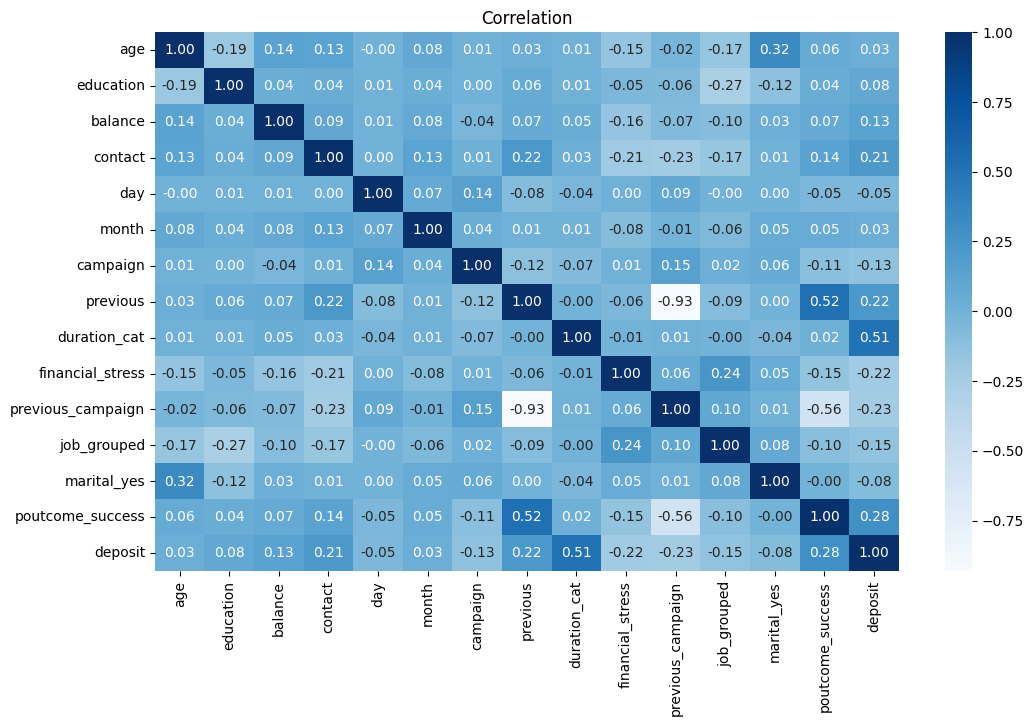

In [ ]:
# Mengecek feature yang tidak berkorelasi dengan target
cor = pd.concat([X_train, y_train], axis=1) #menggabungkan data train dan target(deposit)
corelate = cor.corr() #mengecek nilai korelasi per feature

plt.figure(figsize=(12,7))
sns.heatmap(data=corelate, fmt='.2f', cmap='Blues', annot=True) #memplot hasil korelasi dengan heatmap
plt.title('Correlation')
plt.show()

In [ ]:
#penghapusan feature ini berdasarkan nilai korelasi dengan target yang rendah dan untuk meningkatkan performa model
#pemilihan feature ini sudah di uji beberapa kali untuk menentukan feature mana yang harus dihapus
X_train = X_train.drop('campaign', axis=1)
X_test = X_test.drop('campaign', axis=1)
X_train = X_train.drop('day', axis=1)
X_test = X_test.drop('day', axis=1)
X_train = X_train.drop('education', axis=1)
X_test = X_test.drop('education', axis=1)
X_train = X_train.drop('age', axis=1)
X_test = X_test.drop('age', axis=1)

In [ ]:
X_train.head() #menampilkan lima baris teratas data dengan feature baru

,balance,contact,month,previous,duration_cat,financial_stress,previous_campaign,job_grouped,marital_yes,poutcome_success
3955,4103.5,1,9,2.5,3,0,0,0,0,0
11150,355.0,1,8,0.0,2,0,1,1,1,0
5173,201.0,1,11,1.0,2,0,0,0,0,1
3017,1961.0,1,12,0.0,2,0,1,2,1,0
2910,1624.0,1,11,2.5,1,0,0,1,1,1


## Modeling

### Multikolinearitas

In [ ]:
X = add_constant(X_train) # mengecek nilai vif score per feature

vif_bank = pd.DataFrame([vif(X.values, i)
                          for i in range(X.shape[1])],
                         index=X.columns).reset_index()
vif_bank.columns = ['feature', 'vif_score']
vif_bank = vif_bank.loc[vif_bank.feature != 'const']
vif_bank

,feature,vif_score
1,balance,1.042189
2,contact,1.134655
3,month,1.030514
4,previous,7.536379
5,duration_cat,1.005482
6,financial_stress,1.137103
7,previous_campaign,8.021179
8,job_grouped,1.093868
9,marital_yes,1.017142
10,poutcome_success,1.494257


**Penjelasan VIF 1:**<br>
Terdapat fitur dengan nilai VIF lebih dari 4, yaitu pdays dan previous.

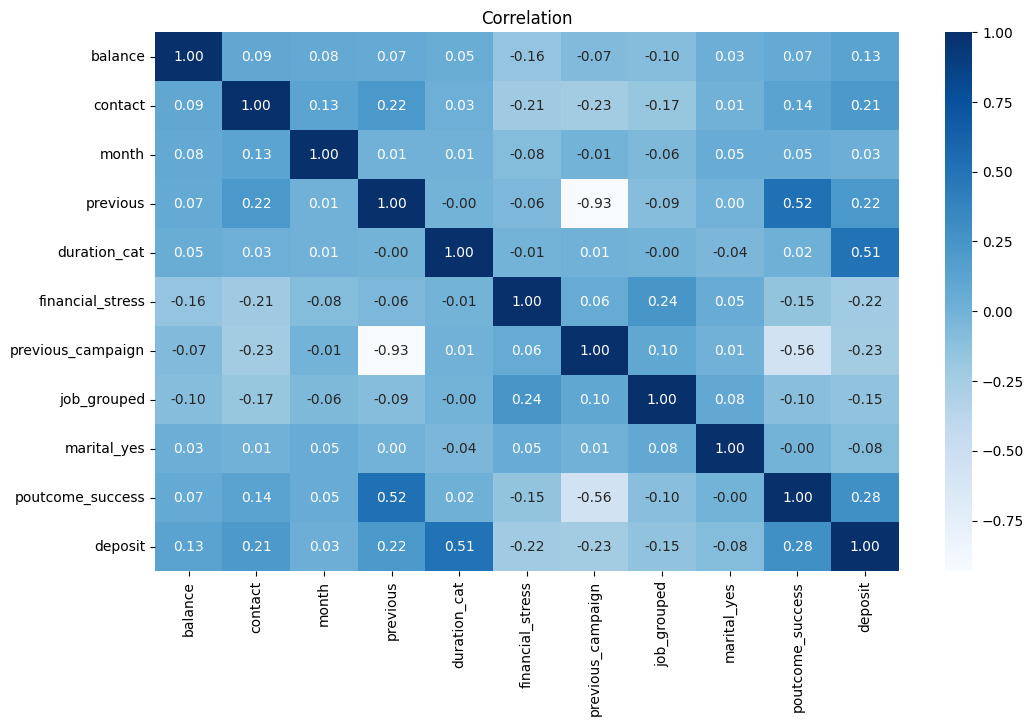

In [ ]:
cor = pd.concat([X_train, y_train], axis=1) #menggabungkan data train dan target(deposit)
corelate = cor.corr() #mengecek nilai korelasi per feature

plt.figure(figsize=(12,7))
sns.heatmap(data=corelate, fmt='.2f', cmap='Blues', annot=True) #memplot hasil korelasi dengan heatmap
plt.title('Correlation')
plt.show()

**Penjelasan Heatmap:**<br>
Feature previous dihapus.

In [ ]:
X_train = X_train.drop('previous', axis=1) #menghapus feature previous pada data train
X_test = X_test.drop('previous', axis=1) #menghapus feature previous pada data test

In [ ]:
X = add_constant(X_train) #mengecek kembali nilai vif score per feature

vif_bank = pd.DataFrame([vif(X.values, i)
                          for i in range(X.shape[1])],
                         index=X.columns).reset_index()
vif_bank.columns = ['feature', 'vif_score']
vif_bank = vif_bank.loc[vif_bank.feature != 'const']
vif_bank

,feature,vif_score
1,balance,1.042126
2,contact,1.134541
3,month,1.030509
4,duration_cat,1.005476
5,financial_stress,1.137033
6,previous_campaign,1.527848
7,job_grouped,1.093765
8,marital_yes,1.015968
9,poutcome_success,1.494179


**Penjelasan VIF 2:**<br>
Sudah tidak terdapat nilai VIF lebih dari 4.

### SMOTE

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42) #membagi data menjadi 5 bagian/lipatan (persiapan untuk cross validation)

#### Metrics

In [ ]:
def create_pipeline_smote(model, col):#membuat pipeline dengan smote
  processor = ColumnTransformer(
      transformers=[('columns', StandardScaler(), col)]
  )
  pipeline_smote = Pipeline(steps=[
      ('preprocessor', processor),
      ('smote', SMOTE(random_state=42)),
      ('classifier', model)
  ])
  return pipeline_smote

In [ ]:
def metric_smote(X_train, y_train, X_test, y_test, col, kfold):#mengecek metrics dengan model smote untuk perbandingan dengan model non-smote
  models = {
      'Logistic Regression': LogisticRegression(random_state=42), # 4 model yang digunakan
      'Decision Tree': DecisionTreeClassifier(random_state=42),
      'Random Forest': RandomForestClassifier(random_state=42),
      'XGBClassifier': XGBClassifier(random_state=42)
  }

  results =[] #menyimpan hasil metrics evaluasi
  for name, model in models.items(): #melakukan iterasi nama model dan model
    pipeline_smote = create_pipeline_smote(model, col) #membuat model yang sudah distandarisari dan dismote di function create_pipeline_smote


    scoring = {'precision': 'precision', #membuat dictionary untuk mengkelompokan metrics yang dibutuhkan untuk cross validation
               'recall': 'recall',
               'f1': 'f1',
               'accuracy': 'accuracy'}

    crossvalidation = cross_validate(pipeline_smote, X_train, y_train, cv=kfold, scoring=scoring) #menggunakan cross validation untuk mengetahui nilai evaluasi

    #mengambil nilai rata-rata dari crossvalidation
    train_precision = crossvalidation['test_precision'].mean()
    train_recall = crossvalidation['test_recall'].mean()
    train_f1 = crossvalidation['test_f1'].mean()
    train_accuracy = crossvalidation['test_accuracy'].mean()

    #mengecek nilai evaluasi metrics
    pipeline_smote.fit(X_train, y_train)
    y_test_pred = pipeline_smote.predict(X_test)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    #menyimpan hasil evaluasi
    results.append({
        'Model_SMOTE' : name,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1': train_f1,
        'Train Accuracy': train_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1': test_f1,
        'Test Accuracy': test_accuracy
    })

  result_metrics_smote = pd.DataFrame(results) #mengubah hasil evaluasi menjadi dataframe
  result_metrics_smote = result_metrics_smote.sort_values(by=['Test F1'], ascending=False) #mengurutkan hasil evaluasi berdarkan nilai test F1
  return result_metrics_smote

In [ ]:
result_metrics_smote = metric_smote(X_train, y_train, X_test, y_test, X_train.columns, kf) #memanggil fungsi metric_smote
result_metrics_smote

,Model_SMOTE,Train Precision,Train Recall,Train F1,Train Accuracy,Test Precision,Test Recall,Test F1,Test Accuracy
3,XGBClassifier,0.792263,0.838477,0.814673,0.819688,0.792952,0.843486,0.817439,0.819973
2,Random Forest,0.785420,0.817380,0.801011,0.808154,0.784672,0.805998,0.795192,0.801612
0,Logistic Regression,0.779526,0.773860,0.776545,0.789561,0.768950,0.789128,0.778908,0.785938
1,Decision Tree,0.748474,0.737694,0.743020,0.758876,0.742439,0.713215,0.727533,0.744738


### Non-SMOTE

#### Metrics

In [ ]:
def create_pipeline(model, col): #membuat pipeline
  processor = ColumnTransformer(
      transformers=[('columns', StandardScaler(), col)]
  )
  pipeline = Pipeline(steps=[
      ('preprocessor', processor),
      ('classifier', model)
  ])
  return pipeline

In [ ]:
def metric_nonsmote(X_train, y_train, X_test, y_test, col, kfold):#mengecek metrics dengan model non-smote untuk perbandingan dengan model smote
  models = {
      'Logistic Regression': LogisticRegression(random_state=42),# 4 model yang digunakan
      'Decision Tree': DecisionTreeClassifier(random_state=42),
      'Random Forest': RandomForestClassifier(random_state=42),
      'XGBClassifier': XGBClassifier(random_state=42)
  }

  results =[]#menyimpan hasil metrics evaluasi
  for name, model in models.items(): #melakukan iterasi nama model dan model
    pipeline = create_pipeline(model, col)#membuat model yang sudah distandarisari di function create_pipeline


    scoring = {'precision': 'precision',#membuat dictionary untuk mengkelompokan metrics yang dibutuhkan untuk cross validation
               'recall': 'recall',
               'f1': 'f1',
               'accuracy': 'accuracy'}

    crossvalidation = cross_validate(pipeline, X_train, y_train, cv=kfold, scoring=scoring)#menggunakan cross validation untuk mengetahui nilai evaluasi

    #mengambil nilai rata-rata dari crossvalidation
    train_precision = crossvalidation['test_precision'].mean()
    train_recall = crossvalidation['test_recall'].mean()
    train_f1 = crossvalidation['test_f1'].mean()
    train_accuracy = crossvalidation['test_accuracy'].mean()

    pipeline.fit(X_train, y_train)
    y_test_pred = pipeline.predict(X_test)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    #mengecek nilai evaluasi metrics
    results.append({
        'Model' : name,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1': train_f1,
        'Train Accuracy': train_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1': test_f1,
        'Test Accuracy': test_accuracy
    })

  result_metrics = pd.DataFrame(results)#mengubah hasil evaluasi menjadi dataframe
  result_metrics = result_metrics.sort_values(by=['Test F1'], ascending=False)#mengurutkan hasil evaluasi berdarkan nilai test F1
  return result_metrics

In [ ]:
result_metrics_nonsmote = metric_nonsmote(X_train, y_train, X_test, y_test, X_train.columns, kf)#memanggil fungsi metric_nonsmote
result_metrics_nonsmote

,Model,Train Precision,Train Recall,Train F1,Train Accuracy,Test Precision,Test Recall,Test F1,Test Accuracy
3,XGBClassifier,0.799755,0.836567,0.817701,0.823720,0.793566,0.832240,0.812443,0.816391
2,Random Forest,0.783093,0.808241,0.795435,0.803563,0.778802,0.791940,0.785316,0.793103
0,Logistic Regression,0.787964,0.754137,0.770514,0.787769,0.773196,0.773196,0.773196,0.783251
1,Decision Tree,0.748701,0.740998,0.744779,0.759884,0.748293,0.718838,0.733270,0.750112


**Penjelasan metrics:**<br>



*   Model dengan SMOTE dan non-smote memiliki hasil evaluasi yang tidak jauh berbeda.
*   XGBclassifier model paling unggul dibandingkan model lainnya dengan membandingkan nilai precision, recall, f1 score, dam accuracy.
*   Analisis prediksi respon deposito dilanjutkan dengan hyperparameter tuning model non-smote.








### Hypertuning Parameters

In [ ]:
def tuning_lr(trial): #membuat fungsi hyperparameter tuning model logistic regression dengan optuna
      params = {
        'C': trial.suggest_float('C', 0.01, 10.0, log=True),
        'max_iter': trial.suggest_int('max_iter', 100, 500)
    }
      model = LogisticRegression(**params, random_state=42)
      pipeline = create_pipeline(model, X_train.columns)

      f1 = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='f1')
      f1_score = f1.mean()

      return f1_score

studylr = optuna.create_study(direction='maximize')
studylr.optimize(tuning_lr, n_trials=10)
best_param_lr = studylr.best_params

print('Best Hyperparameters:', best_param_lr)
print('Best F1:',studylr.best_value)

[I 2024-12-30 10:20:17,618] A new study created in memory with name: no-name-16a36f8d-fd0c-4fa4-9a56-b313918a62e1
[I 2024-12-30 10:20:17,770] Trial 0 finished with value: 0.7705136264954776 and parameters: {'C': 6.977821889933934, 'max_iter': 496}. Best is trial 0 with value: 0.7705136264954776.
[I 2024-12-30 10:20:17,948] Trial 1 finished with value: 0.7705136264954776 and parameters: {'C': 0.7750625421975549, 'max_iter': 341}. Best is trial 0 with value: 0.7705136264954776.
[I 2024-12-30 10:20:18,116] Trial 2 finished with value: 0.7705136264954776 and parameters: {'C': 8.389688326201997, 'max_iter': 224}. Best is trial 0 with value: 0.7705136264954776.
[I 2024-12-30 10:20:18,293] Trial 3 finished with value: 0.7705136264954776 and parameters: {'C': 0.23927023701718983, 'max_iter': 258}. Best is trial 0 with value: 0.7705136264954776.
[I 2024-12-30 10:20:18,453] Trial 4 finished with value: 0.7705136264954776 and parameters: {'C': 0.8979013954303399, 'max_iter': 116}. Best is trial 0

Best Hyperparameters: {'C': 6.977821889933934, 'max_iter': 496}
Best F1: 0.7705136264954776


In [ ]:
def tuning_dt(trial):#membuat fungsi hyperparameter tuning model decision tree dengan optuna
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)
    }
    model = DecisionTreeClassifier(**params, random_state=42)
    pipeline = create_pipeline(model, X_train.columns)

    f1 = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='f1')
    f1_score = f1.mean()

    return f1_score

studydt = optuna.create_study(direction='maximize')
studydt.optimize(tuning_dt, n_trials=10)
best_param_dt = studydt.best_params

print('Best Hyperparameters:', best_param_dt)
print('Best F1:',studydt.best_value)

[I 2024-12-30 10:20:19,660] A new study created in memory with name: no-name-3df3b3ef-0af1-45f2-b30c-6c26aaa5f0e0
[I 2024-12-30 10:20:19,881] Trial 0 finished with value: 0.806947789760667 and parameters: {'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.806947789760667.
[I 2024-12-30 10:20:20,036] Trial 1 finished with value: 0.7557393186226026 and parameters: {'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.806947789760667.
[I 2024-12-30 10:20:20,202] Trial 2 finished with value: 0.7560403068390216 and parameters: {'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.806947789760667.
[I 2024-12-30 10:20:20,430] Trial 3 finished with value: 0.8013245192872887 and parameters: {'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.806947789760667.
[I 2024-12-30 10:20:20,626] Trial 4 finished with value: 0.801872697979

Best Hyperparameters: {'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 4}
Best F1: 0.811014616975655


In [ ]:
def tuning_rf(trial): #membuat fungsi hyperparameter tuning model random forest dengan optuna
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10)
    }
    model = RandomForestClassifier(**params, random_state=42)

    pipeline = create_pipeline(model, X_train.columns)

    f1 = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='f1')
    f1_score = f1.mean()

    return f1_score

studyrf = optuna.create_study(direction='maximize')
studyrf.optimize(tuning_rf, n_trials=10)
best_param_rf = studyrf.best_params

print('Best Hyperparameters:', best_param_rf)
print('Best F1:',studyrf.best_value)

[I 2024-12-30 10:20:21,631] A new study created in memory with name: no-name-324076e1-482f-4f1f-a7b3-1ac1d91e1960
[I 2024-12-30 10:20:23,106] Trial 0 finished with value: 0.8049209801205386 and parameters: {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 7}. Best is trial 0 with value: 0.8049209801205386.
[I 2024-12-30 10:20:27,595] Trial 1 finished with value: 0.8241468092569779 and parameters: {'n_estimators': 160, 'max_depth': 9, 'min_samples_split': 4}. Best is trial 1 with value: 0.8241468092569779.
[I 2024-12-30 10:20:32,164] Trial 2 finished with value: 0.8281445473129267 and parameters: {'n_estimators': 155, 'max_depth': 10, 'min_samples_split': 6}. Best is trial 2 with value: 0.8281445473129267.
[I 2024-12-30 10:20:34,164] Trial 3 finished with value: 0.818394919215071 and parameters: {'n_estimators': 53, 'max_depth': 8, 'min_samples_split': 3}. Best is trial 2 with value: 0.8281445473129267.
[I 2024-12-30 10:20:38,122] Trial 4 finished with value: 0.8152659599467293 

Best Hyperparameters: {'n_estimators': 155, 'max_depth': 10, 'min_samples_split': 6}
Best F1: 0.8281445473129267


In [ ]:
def tuning_xgb(trial): #membuat fungsi hyperparameter tuning model xgboost dengan optuna
    params = {
      'n_estimators': trial.suggest_int('n_estimators', 50, 200),
      'max_depth': trial.suggest_int('max_depth', 3, 10),
      'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
      'subsample': trial.suggest_float('subsample', 0.7, 1.0)
      }
    model = XGBClassifier(**params, random_state=42)

    pipeline = create_pipeline(model, X_train.columns)

    f1 = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='f1')
    f1_score = f1.mean()

    return f1_score

studyxgb = optuna.create_study(direction='maximize')
studyxgb.optimize(tuning_xgb, n_trials=10)
best_param_xgb = studyxgb.best_params

print('Best Hyperparameters:', best_param_xgb)
print('Best F1:',studyxgb.best_value)

[I 2024-12-30 10:20:55,939] A new study created in memory with name: no-name-f06d48da-4c6f-47f9-87d4-0b0c5ca75008
[I 2024-12-30 10:20:57,065] Trial 0 finished with value: 0.8122588739589622 and parameters: {'n_estimators': 194, 'max_depth': 6, 'learning_rate': 0.1968885597492912, 'subsample': 0.999825555166985}. Best is trial 0 with value: 0.8122588739589622.
[I 2024-12-30 10:20:57,918] Trial 1 finished with value: 0.8120332974402377 and parameters: {'n_estimators': 62, 'max_depth': 10, 'learning_rate': 0.2009926663005778, 'subsample': 0.708080356550611}. Best is trial 0 with value: 0.8122588739589622.
[I 2024-12-30 10:20:59,134] Trial 2 finished with value: 0.8075169896618704 and parameters: {'n_estimators': 141, 'max_depth': 8, 'learning_rate': 0.21738908959743797, 'subsample': 0.9370523321576059}. Best is trial 0 with value: 0.8122588739589622.
[I 2024-12-30 10:20:59,551] Trial 3 finished with value: 0.8259287016601353 and parameters: {'n_estimators': 55, 'max_depth': 5, 'learning_r

Best Hyperparameters: {'n_estimators': 59, 'max_depth': 7, 'learning_rate': 0.05674133850258927, 'subsample': 0.9369445987800922}
Best F1: 0.8312561886271478


In [ ]:
#mengkelompokan model dengan best parameter per model
best_params = {
      'LogisticRegression': best_param_lr,
      'DecisionTreeClassifier': best_param_dt,
      'RandomForestClassifier': best_param_rf,
      'XGBClassifier': best_param_xgb
}

### Train vs Test

In [ ]:
def model_best_param(X_train, y_train, X_test, y_test, col, kfold): #membuat fungsi untuk evaluasi model dengan tuning
  models = {
      'LogisticRegression': LogisticRegression,
      'DecisionTreeClassifier': DecisionTreeClassifier,
      'RandomForestClassifier': RandomForestClassifier,
      'XGBClassifier': XGBClassifier
  }

  results =[] #untuk menyimpan hasil
  for name, permodel in models.items(): # membuat iterasi nama model dengan model
    model = permodel(**best_params[name], random_state=42)
    pipeline = create_pipeline(model, col) #membuat model dengan best parameter


    scoring = {'precision': 'precision',#membuat dictionary untuk mengkelompokan metrics yang dibutuhkan untuk cross validation
               'recall': 'recall',
               'f1': 'f1',
               'accuracy': 'accuracy'}
    crossvalidation = cross_validate(pipeline, X_train, y_train, cv=kfold, scoring=scoring)#menggunakan cross validation untuk mengetahui nilai evaluasi

    #mengambil nilai rata-rata dari crossvalidation
    train_precision = crossvalidation['test_precision'].mean()
    train_recall = crossvalidation['test_recall'].mean()
    train_f1 = crossvalidation['test_f1'].mean()
    train_accuracy = crossvalidation['test_accuracy'].mean()

    #mengecek nilai evaluasi metrics
    pipeline.fit(X_train, y_train)
    y_test_pred = pipeline.predict(X_test)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    #mengubah hasil evaluasi menjadi dataframe
    results.append({
        'Model' : name,
        'Train Precision': train_precision,
        'Train Recall': train_recall,
        'Train F1': train_f1,
        'Train Accuracy': train_accuracy,
        'Test Precision': test_precision,
        'Test Recall': test_recall,
        'Test F1': test_f1,
        'Test Accuracy': test_accuracy
    })

  results_tuning = pd.DataFrame(results)
  results_tuning = results_tuning.sort_values(by=['Test F1'], ascending=False)#mengurutkan hasil evaluasi berdarkan nilai test F1
  return results_tuning

In [ ]:
results_tuning = model_best_param(X_train, y_train, X_test, y_test, X_train.columns, kf)#memanggil fungsi model_best_pram
results_tuning

,Model,Train Precision,Train Recall,Train F1,Train Accuracy,Test Precision,Test Recall,Test F1,Test Accuracy
3,XGBClassifier,0.803880,0.860612,0.831256,0.834921,0.798238,0.849110,0.822888,0.825347
2,RandomForestClassifier,0.799887,0.858588,0.828145,0.831561,0.794508,0.840675,0.816940,0.819973
1,DecisionTreeClassifier,0.783972,0.840444,0.811015,0.814874,0.782118,0.844424,0.812078,0.813256
0,LogisticRegression,0.787964,0.754137,0.770514,0.787769,0.773196,0.773196,0.773196,0.783251


**Penjelasan model:**<br>
XGBClassifier merupakan model yang memiliki performa yang baik pada saat ditrain dan ditest dibandingkan model lainnya. Dengan presisi, recall, f1 score dan akurasi yang lebih tinggi dari model lain. Hal ini menunjukan model tersebut dapat memprediksi respon nasabah yang membuka/menolak deposito secara baik.


### Confusion Metrics

In [ ]:
#standarisasi model train dan test
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


#membuat prediksi dan probabilitas model
pred = {}
proba = {}
for model, params in best_params.items():
  if model == 'LogisticRegression':
    modelLR = LogisticRegression(**params, random_state=42).fit(X_train_std, y_train)
    pred['LogisticRegression'] = modelLR.predict(X_test_std)
    proba['LogisticRegression'] = modelLR.predict_proba(X_test_std)
  elif model == 'DecisionTreeClassifier':
    modelDT = DecisionTreeClassifier(**params, random_state=42).fit(X_train_std, y_train)
    pred['DecisionTreeClassifier'] = modelDT.predict(X_test_std)
    proba['DecisionTreeClassifier'] = modelDT.predict_proba(X_test_std)
  elif model == 'RandomForestClassifier':
    modelRF = RandomForestClassifier(**params, random_state=42).fit(X_train_std, y_train)
    pred['RandomForestClassifier'] = modelRF.predict(X_test_std)
    proba['RandomForestClassifier'] = modelRF.predict_proba(X_test_std)
  elif model == 'XGBClassifier':
    modelXGB = XGBClassifier(**params, random_state=42).fit(X_train_std, y_train)
    pred['XGBClassifier'] = modelXGB.predict(X_test_std)
    proba['XGBClassifier'] = modelXGB.predict_proba(X_test_std)

Text(0.5, 1.05, 'Confusion Matrix')

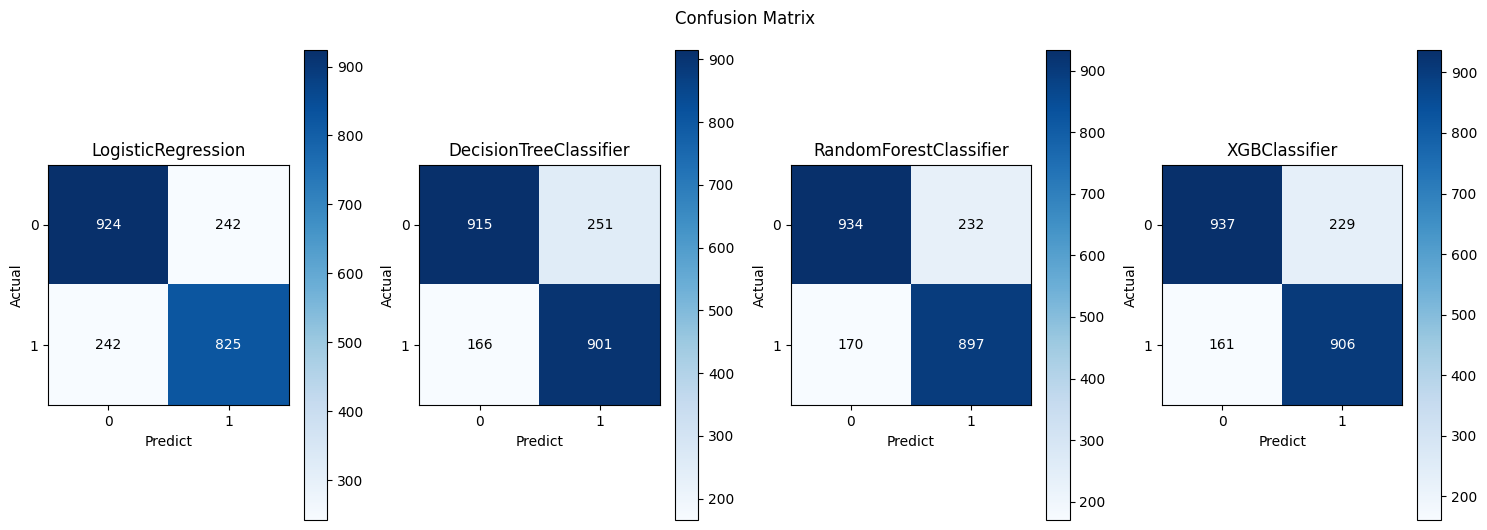

In [ ]:
#Confusion Matrix
ig, axes =   plt.subplots(1, len(pred), figsize=(15,5))

for i, (title, pred) in enumerate(pred.items()):
  skplt.metrics.plot_confusion_matrix(y_test, pred, ax=axes[i])
  axes[i].set_title(title)
  axes[i].set_xlabel('Predict')
  axes[i].set_ylabel('Actual')
plt.tight_layout()
plt.suptitle('Confusion Matrix', y=1.05)

**Penjelasan confusion matrix:**<br>
XGBClassifier merupakan model yang unggul pada test confusion matrix. Jumlah True Positives (TP) dan True Negative (TN) lebih tinggi dibandingkan model lainnya. Sedangkan, kesalahan prediksi False Positive (FP) dan False Negative (FN) lebih sedikit dari model lainnya.

Text(0.5, 1.05, 'ROC Curves')

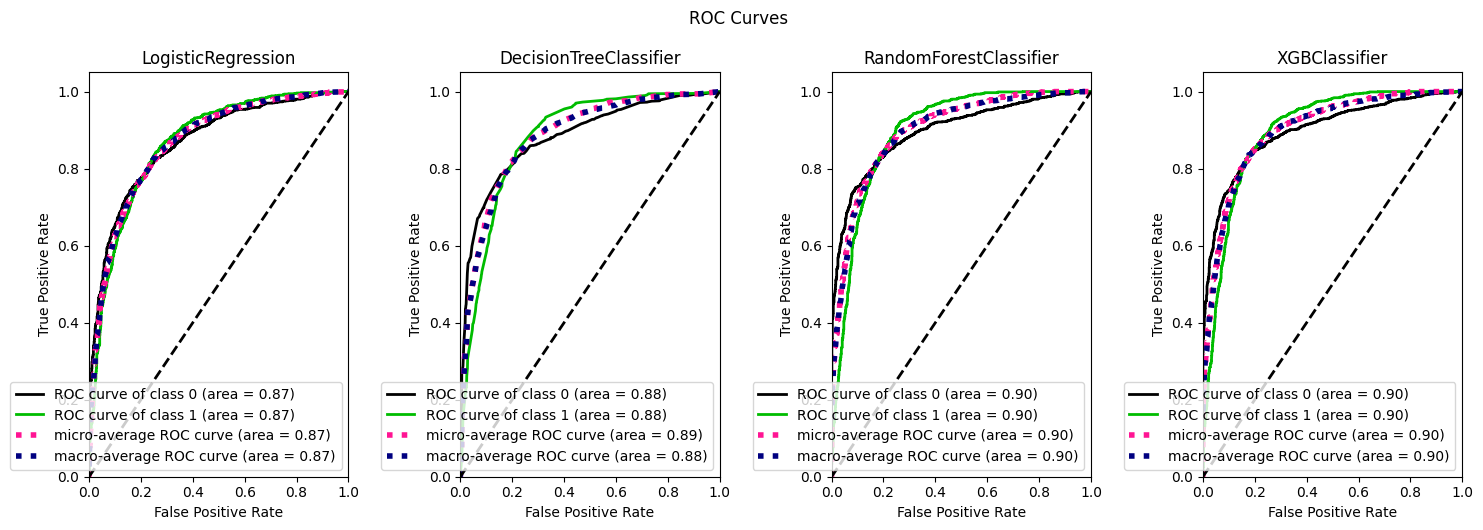

In [ ]:
# ROC-AUC
fig, axes =   plt.subplots(1, len(proba), figsize=(15,5))

for i, (title, proba) in enumerate(proba.items()):
  skplt.metrics.plot_roc(y_test, proba, ax=axes[i])
  axes[i].set_title(title)
  axes[i].set_xlabel('False Positive Rate')
  axes[i].set_ylabel('True Positive Rate')
plt.tight_layout()
plt.suptitle('ROC Curves', y=1.05)

**Penjelasan ROC-AUC:**<br>
*   XGBClassifier dan Random Forest merupakan model yang ungul dibandingkan model lainnya, dengan nilai ROC-AUC 0.90.
*    Nilai tersebut menunjukan bahwa model XGBClassifier dan Random Forest sangat baik dalam membedakan respon nasabah yang akan membuka/menolak deposito.



### Interpretation Model

**Kesimpulan Model:**<br>
*   **XGBClassifier** merupakan model yang memiliki performa yang baik, dengan nilai **presisi, recall, F1-score, dan akurasi** yang unggul dibandingkan model yang lain. Hal ini dapat terlihat jelas pada **confusion matrix**, di mana model ini dapat mengklasifikasikan lebih banyak data dengan benar dibandingkan dengan model lainnya (true positive dan true negative), serta lebih sedikit melakukan kesalahan (false positive dan false negative).
*   Selain itu, nilai **AUC** yang tinggi menunjukan bahwa model tersebut sangat efektif dalam membedakan respon nasabah yang akan membuka/menolak deposito.
*   Keunggulan-keunggulan ini menunjukan bahwa **XGBClassifier** dapat memberikan prediksi yang lebih akurat dan efektif, yang sangat penting dalam analisis prediksi respon nasabah. Karena itu, model ini sangat direkomendasikan untuk memprediksi respon nasabah yang membutuhkan akurasi tinggi.






### Feature Importance

In [ ]:
XGB_exp = dx.Explainer(modelXGB, X_train, y_train, label='XGBOOST Interpretation') #menginterpretasikan model xgboost

Preparation of a new explainer is initiated

  -> data              : 8929 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8929 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBOOST Interpretation
  -> predict function  : <function yhat_proba_default at 0x7ff209a39480> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0716, mean = 0.807, max = 0.945
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.945, mean = -0.334, max = 0.907
  -> model_info        : package xgboost

A new explainer has been created!


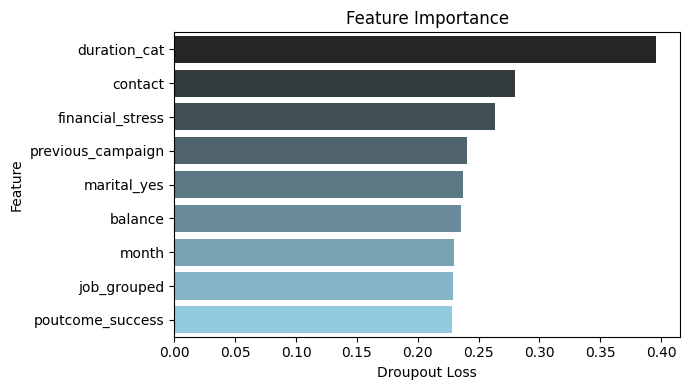

In [ ]:
#Feature Importance Check
modelparts = XGB_exp.model_parts()

parts = modelparts.result.sort_values(by='dropout_loss', ascending=False)
parts_feature = parts[(parts['variable'] != '_baseline_') & (parts['variable'] != '_full_model_')]

plt.figure(figsize=(7,4))
sns.barplot(x='dropout_loss', y='variable', hue='variable', data=parts_feature, palette='dark:skyblue')
plt.xlabel('Droupout Loss')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.tight_layout()


In [ ]:
#Partial Dependence Plot (PDP)
modelprofile = XGB_exp.model_profile(variables=['duration_cat'])
modelprofile.plot()

Calculating ceteris paribus:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.03 0.06 ... 2.94 2.97 3.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00, 17.26it/s]


**Penjelasan Feature Importance:**<br>
Fitur duration_cat memiliki pengaruh yang signifkan dibandingkan fitur yang lainnya. Hal ini dibuktikan pada hasil analisis pada grafik Partial Dependence Plot (PDP), yang menunjukan adanya peningkatan nilai pada fitur duration_cat dapat membuat prediksi model meningkat. Hal ini menandakan bahwa semakin lama durasi panggilan kepada nasabah yang dilakukan, semakin tinggi kemungkinan keberhasilan terhadap penawaran deposito.

Oleh karena itu, fokus pada perpanjangan durasi komunikasi dengan nasabah dapat menjadi strategi efektif untuk meningkatkan keberhasilan kampanye deposito.

## Recomendation


1. **Contact**
  - Tingkatkan kualitas komunikasi kepada nasabah agar dapat melakukan durasi panggilan lebih lama.
  - Lakukan kontak dengan durasi lebih dari 536 detik atau 9 menit, untuk meningkatkan keberhasilan kampanye.
  - Lakukan kontak kepada nasabah melalui cellular.
  - Fokuskan kontak pada nasabah yang belum pernah diberikan kampanye marketing produk deposito.
2. **Financial**
  - Fokuskan kampanye marketing pada nasabah yang memiliki stress keuangan yang rendah (tidak ada pinjaman pribadi, pinjaman rumah dan kredit macet).
  - Berikan penawaran produk deposito premium pada nasabah yang memiliki saldo rata-rata tabungan di atas atau sama dengan 1759 Euro.
  - Berikan penawaran produk deposito dengan setoran awal rendah pada nasabah yang memiliki saldo rata-rata tabungan di bawah 1759 Euro.
3. **Customer Demographics**
  - Pekerjaan
    - Fokuskan kampanye marketing pada nasabah yang memiliki pekerjaan kantoran dan teknisi.
  - Status pernikahan
	  - Fokuskan kampanye marketing pada nasabah yang memiliki status pernikahan.
5. **Tambahan**
  - Setelah dilakukan kontak kepada nasabah berikan form feedback untuk meningkatkan kampanye selanjutnya.
  - Penawaran pembukaan deposito awal dapat diberikan bonus atau cashback untuk menarik minat nasabah.
  - Kampanye marketing selain melalui kontak menggunakan komunikasi jarak jauh, dapat juga secara offline. Misalnya, lakukan kampanye marketing di stasiun KRL/LRT/MRT karena banyak pegawai kantoran yang berangkat atau pulang kerja.


## Pre-Deployment

In [ ]:
new_bank = pd.concat([X_train, y_train], axis=1)
new_bank.head(1)

,balance,contact,month,duration_cat,financial_stress,previous_campaign,job_grouped,marital_yes,poutcome_success,deposit
3955,4103.5,1,9,3,0,0,0,0,0,1


In [ ]:
input_data = [4103.5, 1, 9, 3, 0, 0, 0, 0, 0] #mengetest model dengan satu data

input_data_df = pd.DataFrame([input_data], columns=X_train.columns)

std_data = scaler.transform(input_data_df)

prediction = modelXGB.predict(std_data)
print(prediction)

if prediction == 0:
  print('The customer is likely to reject opening a deposit account.')
elif prediction == 1:
  print('The customer is likely to open a deposit account.')

[1]
The customer is likely to open a deposit account.


In [ ]:
#membagi data test 3 bagian untuk test deploy
test_01 = X_test[:700]
test_02 = X_test[700:1400]
test_03 = X_test[1400:2100]

In [ ]:
input_data_df = pd.DataFrame(test_01) #mengetest data dengan salah satu test data

std_data = scaler.transform(input_data_df)

prediction = modelXGB.predict(std_data)

input_data_df['prediction'] = prediction

input_data_df['prediction'] = input_data_df['prediction'].map({0:'No', 1:'Yes'})

input_data_df.head()

,balance,contact,month,duration_cat,financial_stress,previous_campaign,job_grouped,marital_yes,poutcome_success,prediction
5527,744,1,7,1,0,1,0,0,0,No
4541,1627,0,6,3,0,1,5,1,0,Yes
1964,4963,1,5,2,1,0,5,0,0,Yes
5007,8229,1,8,3,0,1,5,1,0,Yes
8928,1473,0,5,0,1,1,3,1,0,No


In [ ]:
joblib.dump(modelXGB, 'modelXGB.joblib') #menyimpan data untuk deployment
print('success')

success


In [ ]:
joblib.dump(scaler, 'scaler.joblib') #menyimpan data untuk deployment
print('success')

success


Deployment dilanjutkan di streamlit